In [2]:
import numpy as np
import pandas as pd

In [3]:
courses = pd.read_csv('OneDrive/Área de Trabalho/mac434/anonimized_courses.csv')
logs = pd.read_csv('OneDrive/Área de Trabalho/mac434/anonimized_logs.csv')
regs = pd.read_csv('OneDrive/Área de Trabalho/mac434/anonimized_registrations.csv')
sections = pd.read_csv('OneDrive/Área de Trabalho/mac434/anonimized_sections.csv')
tasks = pd.read_csv('OneDrive/Área de Trabalho/mac434/anonimized_tasks.csv')
users = pd.read_csv('OneDrive/Área de Trabalho/mac434/anonimized_users.csv')

Iniciar aqui a seleção dos 25 mais ativos, utilizando o critério de mais tempo assistindo vídeos na plataforma:

In [5]:
timeWatched = tasks[['duration','uuid']]
#remover 0 minutos (ruido)
timeWatched = timeWatched[timeWatched['duration'] > 0]
timeWatched.sort_values(by='duration', ascending=False).head()

,duration,uuid
3624,2649,26524
9876,2379,29717
3230,2372,62809
6676,2209,13311
2958,2094,15093


In [6]:
timeWatched.hist(column='duration',bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E703431908>]],
      dtype=object)

In [7]:
#pegar os top 25% com mais tempo assistido
top25 = timeWatched.sort_values(by='duration', ascending=False).head(int(len(timeWatched)*0.25))
top25.head()

,duration,uuid
3624,2649,26524
9876,2379,29717
3230,2372,62809
6676,2209,13311
2958,2094,15093


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E704303C50>]],
      dtype=object)

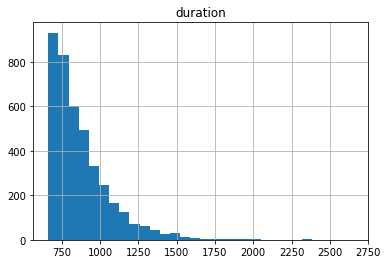

In [8]:
top25.hist(column='duration', bins=30)

Acima, temos a distribuição do tempo em que os alunos do quartil superior gastam na plataforma (Tempo em minutos X quantidade de alunos)

In [9]:
statuses = top25.merge(regs, left_on='uuid',right_on='user_uuid')
statuses.head()

,duration,uuid,user_uuid,course_uuid,createdAt,finishedAt,lastAccessDate,currentState
0,2649,26524,26524,928,2017-08-05 14:18:18,NaN,2019-06-07 15:31:44,IN_PROGRESS
1,2649,26524,26524,543,2017-08-08 07:29:22,NaN,2017-08-08 10:37:59,IN_PROGRESS
2,2649,26524,26524,49,2017-08-16 13:09:18,NaN,2017-08-19 18:10:32,IN_PROGRESS
3,2649,26524,26524,117,2017-08-16 13:45:16,NaN,2017-08-23 20:40:32,IN_PROGRESS
4,2649,26524,26524,1028,2017-10-05 15:51:58,NaN,2017-10-05 15:53:22,IN_PROGRESS


In [10]:
statuses = statuses[statuses.currentState!='NOT_VISIBLE']
statuses = statuses[statuses.currentState!='BOOKMARKED']

Aqui, fazemos a remoção de estados de curso irrelevantes para nossa análise, deixando apenas IN_PROGRESS e PAUSED a serem analisados

In [11]:
#curso completado -> com data e in_progress // curso pausado -> resto
statuses['completion'] = np.where((statuses['currentState']=='IN_PROGRESS') & (statuses['finishedAt'].notna()), 'completed', 'paused')

In [12]:
statuses.head()

,duration,uuid,user_uuid,course_uuid,createdAt,finishedAt,lastAccessDate,currentState,completion
0,2649,26524,26524,928,2017-08-05 14:18:18,NaN,2019-06-07 15:31:44,IN_PROGRESS,paused
1,2649,26524,26524,543,2017-08-08 07:29:22,NaN,2017-08-08 10:37:59,IN_PROGRESS,paused
2,2649,26524,26524,49,2017-08-16 13:09:18,NaN,2017-08-19 18:10:32,IN_PROGRESS,paused
3,2649,26524,26524,117,2017-08-16 13:45:16,NaN,2017-08-23 20:40:32,IN_PROGRESS,paused
4,2649,26524,26524,1028,2017-10-05 15:51:58,NaN,2017-10-05 15:53:22,IN_PROGRESS,paused


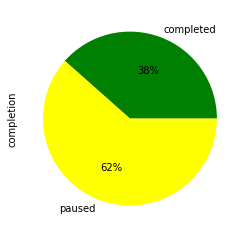

In [14]:
statuses.groupby('completion')['completion'].count().plot.pie(colors = ['green','yellow'], autopct='%1.0f%%')

In [13]:
statuses.groupby('completion')['completion'].count()

completion
completed     8475
paused       13562
Name: completion, dtype: int64

Pelo gráfico, percebe-se que a maioria dos alunos os quais consideramos "os mais estudiosos" não completam seus cursos, mas sim os pausam em pontos arbitrários, sem necessáriamente haver um critério